In [64]:
import tsplib95
import matplotlib.pyplot as plt
import numpy as np

from tsp import *

In [65]:
fileName = 'wi29.tsp'
tsp = TSP(tsplib95.load(fileName))

In [66]:
def get_central_point(tsp):
    coords = np.array(list(tsp._coords.values()))
    center = np.mean(coords, axis=0)
    return center

In [75]:
def get_random_points(tsp, radius=1000):
    x, y = get_central_point(tsp) + np.random.randint(1000)
    N = tsp._no_nodes
    M = int(2.5 * N)
    theta_lst = sorted(np.random.uniform(low=0, high=2 * np.pi, size=(M,)))
    points = np.array([(x + radius * np.cos(theta), y + radius * np.sin(theta)) for theta in theta_lst])
    return points

In [76]:
points = get_random_points(tsp, radius=1000) / 2000
cities = np.array(list(tsp._coords.values())) / 2000

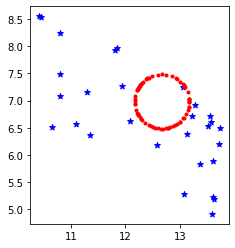

In [77]:
X = [x[0] for x in cities]
Y = [x[1] for x in cities]

# elastic ring
x = [x[0] for x in points]
y = [x[1] for x in points]

fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.scatter(X, Y, color='blue', marker='*')
plt.scatter(x, y, color='red', marker='.')
plt.show()

# update the position of the points on the path

In [78]:
from numpy import linalg as LA
from collections import defaultdict

In [79]:
def get_nearset_cities(cities, points):
        nearest_cities = defaultdict(list)
        for i, x in enumerate(cities):
            dis = [LA.norm(x - y) for y in points]
            j = np.argmin(dis)
            nearest_cities[j].append(i)
        return nearest_cities

In [80]:
def update(cities, points, epoch, alpha=0.2, beta=2.0, K=0.2, n=25):
    
    def get_w(x, y):
        nonlocal K
        nonlocal cities
        nonlocal nearest_cities
        denominator = np.sum([np.exp(-LA.norm(cities[i] - y)**2/(2 * K**2)) for i in nearest_cities[j]])
        return np.exp(-LA.norm(x - y)**2 / (2 * K**2)) / denominator
    
    K = K * (1 - 0.01 * epoch / n)
    nearest_cities = get_nearset_cities(cities, points)
    delta_y = [None] * len(points)
    for j, y in enumerate(points):
        delta_y[j] = alpha * np.sum([get_w(cities[i], y) * (cities[i] - y) for i in nearest_cities[j]]) \
                       + beta * K * (points[(j + 1) % len(points) - 1] - 2 * y + points[len(points) - 1 if (j - 1) < 0 else j - 1])
    points += np.array(delta_y)
    return points

In [83]:
for i in range(500):
    points = update(cities, points, i)

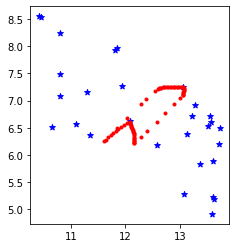

In [84]:
X = [x[0]for x in cities]
Y = [x[1] for x in cities]

# elastic ring
x = [x[0] for x in points]
y = [x[1] for x in points]

fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.scatter(X, Y, color='blue', marker='*')
plt.scatter(x, y, color='red', marker='.')
plt.show()